In [1]:
import os
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd
import folium as fl
import pathlib
from rasterio.merge import merge
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
local_path = pathlib.Path("/home/cap/Downloads/ROAD_MODEL_DATA/DSM")

In [3]:
tif_tiles=[item for item in local_path.rglob("*.tif") if item.is_file()]

In [4]:
load_tif=[rio.open(f) for f in tif_tiles]

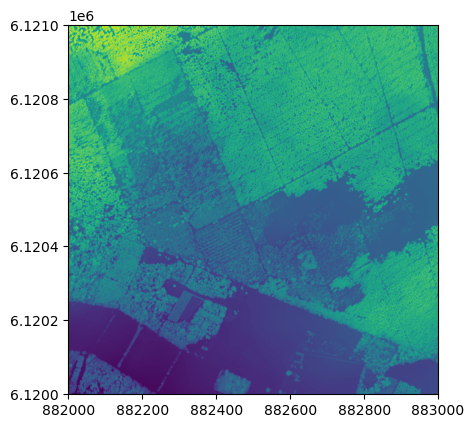

<Axes: >

In [5]:
show(load_tif[0])

In [6]:
mosaic, output = merge(load_tif)

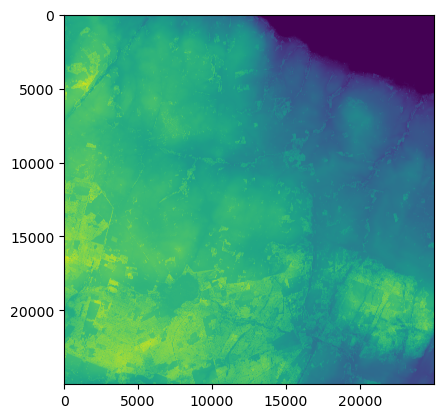

<Axes: >

In [7]:
show(mosaic)

In [7]:
load_tif[0].bounds

BoundingBox(left=882000.0, bottom=6120000.0, right=883000.0, top=6121000.0)

In [8]:
#This is the station in Bornholm near where Jens lives. Station 2344
from shapely.geometry import Point
station_east = 880882.496172
station_nort = 6129340.260074
points = [Point(station_east,station_nort)]
gdf = gpd.GeoDataFrame([1], geometry=points, crs=32630)


In [9]:
SAVE_BORNHOLM=False

In [10]:
#The lines below are to save the merged part.

In [11]:
if SAVE_BORNHOLM:
    out_meta = load_tif[0].meta.copy()
    out_meta.update({"driver":"GTiff","height":mosaic.shape[1],"width":mosaic.shape[2],
                "transform":output}
    )
    with rio.open("merged_bornholm_part.tif","w",**out_meta) as f:
        f.write(mosaic)
    bornholm=rio.open("merged_bornholm_part.tif")
    bornholm.bounds
    # Plot the point of station 2344 on top of the whole thing
    
    

    fig, ax = plt.subplots()

    extent=[bornholm.bounds[0], bornholm.bounds[2], bornholm.bounds[1], bornholm.bounds[3]]
    ax = rio.plot.show(bornholm, extent=extent,ax=ax, cmap='pink')

    gdf.plot(ax=ax)
    plt.show()

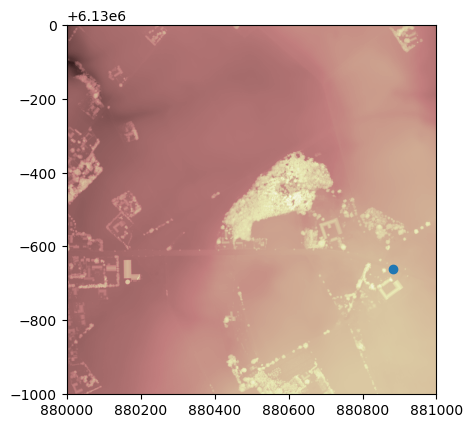

In [12]:
# open the 6129_880, which according to the view if the upper left corner and  plot the station on top
dsm_station = rio.open("/home/cap/Downloads/ROAD_MODEL_DATA/DSM//DSM_1km_6129_880.tif")
fig, ax = plt.subplots()

extent=[dsm_station.bounds[0], dsm_station.bounds[2], dsm_station.bounds[1], dsm_station.bounds[3]]
ax = rio.plot.show(dsm_station, extent=extent,ax=ax, cmap='pink')

gdf.plot(ax=ax)
plt.show()

In [13]:
# cut the relevant district from the data
data_path="data/sogne_utm.geojson"
parishes_dk = gpd.read_file(data_path)
parishes_dk

,FEAT_ID,SOGNEKODE,SOGNENAVN,geometry
0,97621048.0,7284,Tølløse,POLYGON Z ((6170791.99999 674853.00000 -999.00...
1,97621049.0,8214,Virring,POLYGON Z ((6253945.00000 579450.00000 -999.00...
2,97621050.0,7878,Åsum,POLYGON Z ((6138390.00000 592522.00000 -999.00...
3,97621051.0,7828,Roerslev,POLYGON Z ((6147611.00000 555532.00000 -999.00...
4,97621052.0,8394,Øland,POLYGON Z ((6326413.47000 537686.57000 -999.00...
...,...,...,...,...
2463,97623511.0,8769,Videbæk,POLYGON Z ((6220636.00000 477347.00000 -999.00...
2464,97623512.0,9092,Nørremarks,POLYGON Z ((6174546.00000 534263.00000 -999.00...
2465,97623513.0,8523,Hvam,POLYGON Z ((6280961.00000 532034.00000 -999.00...
2466,97623514.0,7447,Birkerød,POLYGON Z ((6195831.99998 721577.00000 -999.00...


https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/
    https://spatial-dev.guru/2022/09/15/clip-raster-by-polygon-geometry-in-python-using-rioxarray/

In [14]:
pol_sel=parishes_dk[parishes_dk.SOGNENAVN == "Østerlarsker"]
#print(type(pol_sel))
#print(pol_sel.columns)
#type(pol_sel.geometry)
#for index,row in pol_sel.iterrows():
#    print(row)
all=pol_sel.geometry.to_list()
#print(all)
#for i in all:
#    print(i)
pol_sel.to_file("polygon_selection.shp")
#with open("polygon_selection.shp","w") as f:
#    f.write
pol_again = gpd.read_file("polygon_selection.shp")

In [15]:
pol_again.geometry

0    POLYGON Z ((6126773.99953 876010.99974 -999.00...
Name: geometry, dtype: geometry

In [16]:
from shapely.ops import unary_union
pol_sel = parishes_dk[parishes_dk.SOGNENAVN == "Østerlarsker"]
pol_cut = unary_union(parishes_dk[parishes_dk.SOGNENAVN == "Østerlarsker"].geometry.values)

In [17]:
#pol_sel.geometry.values

#from shapely.geometry import Polygon
#geom = Polygon([[-13315253,3920415], [-13315821.7,4169010.0], [-13019053.84,4168177.65], [-13020302.1595,3921355.7391]])


In [18]:
#type(geom)
#type(pol_sel.geometry)
#pol_sel.total_bounds
#from shapely.geometry import box
#geom =Polygon(*pol_sel.geometry)


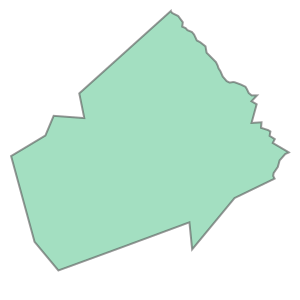

In [19]:
pol_cut

In [20]:
# plot this in the whole patch
#bornholm=rio.open("merged_bornholm_part.tif")
#fig, ax = plt.subplots()

#extent=[bornholm.bounds[0], bornholm.bounds[2], bornholm.bounds[1], bornholm.bounds[3]]
#ax = rio.plot.show(bornholm, extent=extent,ax=ax, cmap='pink')
#g = gpd.GeoSeries([pol_cut])
#g.plot(ax=ax, facecolor='none', edgecolor='cyan',linewidth=3)
#gdf.plot(ax=ax)
#plt.show()

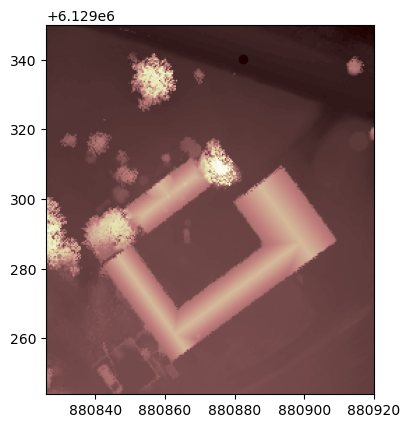

In [77]:
# I ended doing the part below in qgis!
station_dem = rio.open("/home/cap/Downloads/zoom_to_station_jens.tif")

fig, ax = plt.subplots()



extent=[station_dem.bounds[0], station_dem.bounds[2], station_dem.bounds[1], station_dem.bounds[3]]
ax = rio.plot.show(station_dem, extent=extent,ax=ax, cmap='pink')


gdf.plot(ax=ax,cmap="pink",legend=True)

plt.show()
import earthpy.plot as ep

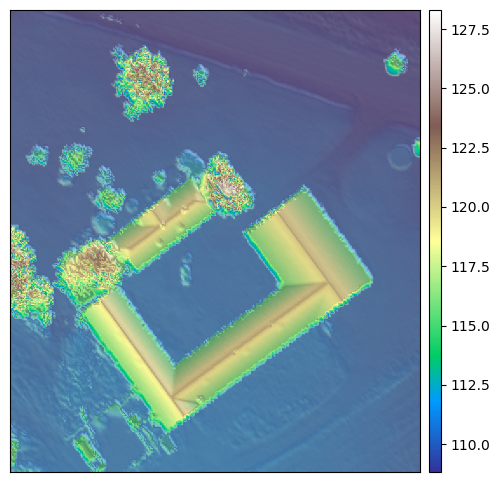

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
import numpy as np
RASTER="/home/cap/Downloads/zoom_to_station_jens.tif"
with rio.open(RASTER) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain"
    #title="Digital Surface Model (DSM)\n overlayed on top of a hillshade",
)
import earthpy.spatial as es

hillshade = es.hillshade(elevation)

plot_data = ax.imshow(hillshade, cmap="terrain", alpha=0.5)

plt.show()

In [21]:
bounds = pol_cut.bounds
west_c, south_c, east_c, north_c = bounds

import rioxarray as riox
raster = riox.open_rasterio("/home/cap/Downloads/ROAD_MODEL_DATA/DSM//DSM_1km_6129_880.tif")
clipped_raster = raster.rio.clip([pol_cut])
clipped_raster.rio.to_raster("region_around_station.tif")
#import elevation
#elevation.clip(bounds=bounds, output=dsm_station)

NoDataInBounds: No data found in bounds.

In [49]:
raster.coords["x"]

<xarray.DataArray 'x' (x: 2500)>
array([880000.2, 880000.6, 880001. , ..., 880999. , 880999.4, 880999.8])
Coordinates:
  * x            (x) float64 8.8e+05 8.8e+05 8.8e+05 ... 8.81e+05 8.81e+05
    spatial_ref  int64 0

In [50]:
raster.coords["y"]

<xarray.DataArray 'y' (y: 2500)>
array([6129999.8, 6129999.4, 6129999. , ..., 6129001. , 6129000.6, 6129000.2])
Coordinates:
  * y            (y) float64 6.13e+06 6.13e+06 6.13e+06 ... 6.129e+06 6.129e+06
    spatial_ref  int64 0

In [58]:
pol_cut.bounds

(875117.999749, 6126042.999515, 883206.169691, 6134706.309509)

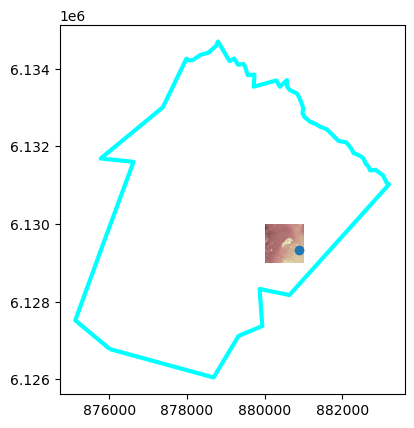

In [42]:
dsm_station = rio.open("region_around_station.tif")
fig, ax = plt.subplots()

extent=[dsm_station.bounds[0], dsm_station.bounds[2], dsm_station.bounds[1], dsm_station.bounds[3]]
ax = rio.plot.show(dsm_station, extent=extent,ax=ax, cmap='pink')
g = gpd.GeoSeries([pol_cut])
g.plot(ax=ax, facecolor='none', edgecolor='cyan',linewidth=3)
gdf.plot(ax=ax)
plt.show()

In [95]:
from osgeo import gdal

In [102]:
#fn_clip = 'output.tif'
#gdal.Warp(fn_clip, raster, cutlineDSName=geom, cutlineLayer='polygon', cropToCutline=True)

In [101]:
#points_clip = gpd.clip(dsm_station, pol_sel)